In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Escaladores
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Train, Test
from sklearn.model_selection import train_test_split

# Modelos

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

from sklearn.impute import KNNImputer

# Métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('C:/Users/peni_/Desktop/proyecto/Proyecto-Final-Bootcamp---Dream-Team/data/df_to_encode.csv')

In [3]:
df.head()

,property_types,prices_per_night,ratings,num_reviews,cleaning_fee,dormitorios,camas,baños,maximum_guests,check_in_hour,...,características de la ubicación,cocina y comedor,dormitorio y lavandería,entretenimiento,exterior,internet y oficina,para familias,privacidad y seguridad,seguridad en el hogar,servicios
0,Alojamiento entero,115.0,0.00,0.0,0.0,1.0,1.0,1.0,NaN,900.0,...,2,6,7,1,2,1,0,0,1,4
1,Habitación,46.0,0.00,0.0,15.0,NaN,1.0,0.5,1.0,1020.0,...,0,10,6,0,0,2,0,2,0,1
2,Habitación,47.0,4.66,65.0,0.0,NaN,1.0,0.5,1.0,900.0,...,2,11,8,1,1,1,0,1,0,5
3,Alojamiento entero,100.0,4.89,0.0,35.0,1.0,1.0,1.0,1.0,960.0,...,1,10,10,10,3,2,2,0,5,4
4,Habitación,33.0,4.40,990.0,0.0,NaN,1.0,0.5,1.0,900.0,...,0,3,4,0,1,1,0,0,3,1


He hecho el onehot el knn el mapa de corr, feature importance, y buscar el mejor r2 falta que todo este en archivos pickel, porque queria que le dierais el visto bueno.

OneHotEncoder

In [4]:
df_encoded = df.copy()

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df_encoded[['property_types']])
# Verifica el número de características generadas
feature_names = encoder.get_feature_names_out()
print(f'Number of feature names: {len(feature_names)}')
print(f'Number of encoded features: {encoded_features.shape[1]}')

# Crear el DataFrame con las características codificadas
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)                                        

Number of feature names: 2
Number of encoded features: 2


He cambiado los nombres para que sea mas fácil para nosotros.

In [5]:
encoded_df = encoded_df.rename(columns={'property_types_Habitación': 'habitacion'})
encoded_df = encoded_df.rename(columns={'property_types_otro': 'alojamiento entero'})
encoded_df.head()

,habitacion,alojamiento entero
0,0.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,0.0
4,1.0,0.0


Lo uno todo a nuestro df principal y dropeo la que nos sobra también cambio a int64 (lo he tenido que poner asi porque se cambiaba a int32 cosa que no me habia pasado antes creo)

In [6]:
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded.head()

,property_types,prices_per_night,ratings,num_reviews,cleaning_fee,dormitorios,camas,baños,maximum_guests,check_in_hour,...,dormitorio y lavandería,entretenimiento,exterior,internet y oficina,para familias,privacidad y seguridad,seguridad en el hogar,servicios,habitacion,alojamiento entero
0,Alojamiento entero,115.0,0.00,0.0,0.0,1.0,1.0,1.0,NaN,900.0,...,7,1,2,1,0,0,1,4,0.0,0.0
1,Habitación,46.0,0.00,0.0,15.0,NaN,1.0,0.5,1.0,1020.0,...,6,0,0,2,0,2,0,1,1.0,0.0
2,Habitación,47.0,4.66,65.0,0.0,NaN,1.0,0.5,1.0,900.0,...,8,1,1,1,0,1,0,5,1.0,0.0
3,Alojamiento entero,100.0,4.89,0.0,35.0,1.0,1.0,1.0,1.0,960.0,...,10,10,3,2,2,0,5,4,0.0,0.0
4,Habitación,33.0,4.40,990.0,0.0,NaN,1.0,0.5,1.0,900.0,...,4,0,1,1,0,0,3,1,1.0,0.0


In [7]:
df_encoded = df_encoded.drop('property_types',axis= 1)

In [8]:
df_encoded['habitacion'] = df_encoded['habitacion'].astype('int64')

In [9]:
df_encoded['alojamiento entero'] = df_encoded['alojamiento entero'].astype('int64')

In [10]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   prices_per_night                 2497 non-null   float64
 1   ratings                          2497 non-null   float64
 2   num_reviews                      2497 non-null   float64
 3   cleaning_fee                     2426 non-null   float64
 4   dormitorios                      1415 non-null   float64
 5   camas                            2394 non-null   float64
 6   baños                            2432 non-null   float64
 7   maximum_guests                   2495 non-null   float64
 8   check_in_hour                    2305 non-null   float64
 9   check_out_hour                   2313 non-null   float64
 10  total_hours_checkin              2305 non-null   float64
 11  aparcamiento e instalaciones     2497 non-null   int64  
 12  baño                

KNNImputer

In [11]:
%%time
imputer = KNNImputer(n_neighbors=3)
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)
df_encoded

CPU times: total: 875 ms
Wall time: 133 ms


,prices_per_night,ratings,num_reviews,cleaning_fee,dormitorios,camas,baños,maximum_guests,check_in_hour,check_out_hour,...,dormitorio y lavandería,entretenimiento,exterior,internet y oficina,para familias,privacidad y seguridad,seguridad en el hogar,servicios,habitacion,alojamiento entero
0,115.0,0.00,0.0,0.0,1.000000,1.0,1.0,3.333333,900.0,720.0,...,7.0,1.0,2.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0
1,46.0,0.00,0.0,15.0,2.000000,1.0,0.5,1.000000,1020.0,660.0,...,6.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0
2,47.0,4.66,65.0,0.0,1.000000,1.0,0.5,1.000000,900.0,720.0,...,8.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0
3,100.0,4.89,0.0,35.0,1.000000,1.0,1.0,1.000000,960.0,720.0,...,10.0,10.0,3.0,2.0,2.0,0.0,5.0,4.0,0.0,0.0
4,33.0,4.40,990.0,0.0,1.666667,1.0,0.5,1.000000,900.0,660.0,...,4.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,55.0,4.74,197.0,10.0,1.000000,1.0,0.5,3.000000,900.0,660.0,...,7.0,1.0,0.0,2.0,0.0,3.0,0.0,1.0,1.0,0.0
2493,60.0,4.78,59.0,0.0,1.000000,1.0,0.5,2.000000,900.0,600.0,...,4.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2494,104.0,4.96,0.0,0.0,2.000000,3.0,2.0,4.000000,900.0,720.0,...,9.0,1.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,0.0
2495,120.0,4.83,136.0,50.0,1.000000,1.0,1.0,2.000000,900.0,660.0,...,8.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0


Creamos una copia de nuestro df

In [12]:
df = df_encoded.copy()

In [13]:
df.head()

,prices_per_night,ratings,num_reviews,cleaning_fee,dormitorios,camas,baños,maximum_guests,check_in_hour,check_out_hour,...,dormitorio y lavandería,entretenimiento,exterior,internet y oficina,para familias,privacidad y seguridad,seguridad en el hogar,servicios,habitacion,alojamiento entero
0,115.0,0.00,0.0,0.0,1.000000,1.0,1.0,3.333333,900.0,720.0,...,7.0,1.0,2.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0
1,46.0,0.00,0.0,15.0,2.000000,1.0,0.5,1.000000,1020.0,660.0,...,6.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0
2,47.0,4.66,65.0,0.0,1.000000,1.0,0.5,1.000000,900.0,720.0,...,8.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0
3,100.0,4.89,0.0,35.0,1.000000,1.0,1.0,1.000000,960.0,720.0,...,10.0,10.0,3.0,2.0,2.0,0.0,5.0,4.0,0.0,0.0
4,33.0,4.40,990.0,0.0,1.666667,1.0,0.5,1.000000,900.0,660.0,...,4.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0


Heatmap

<Axes: >

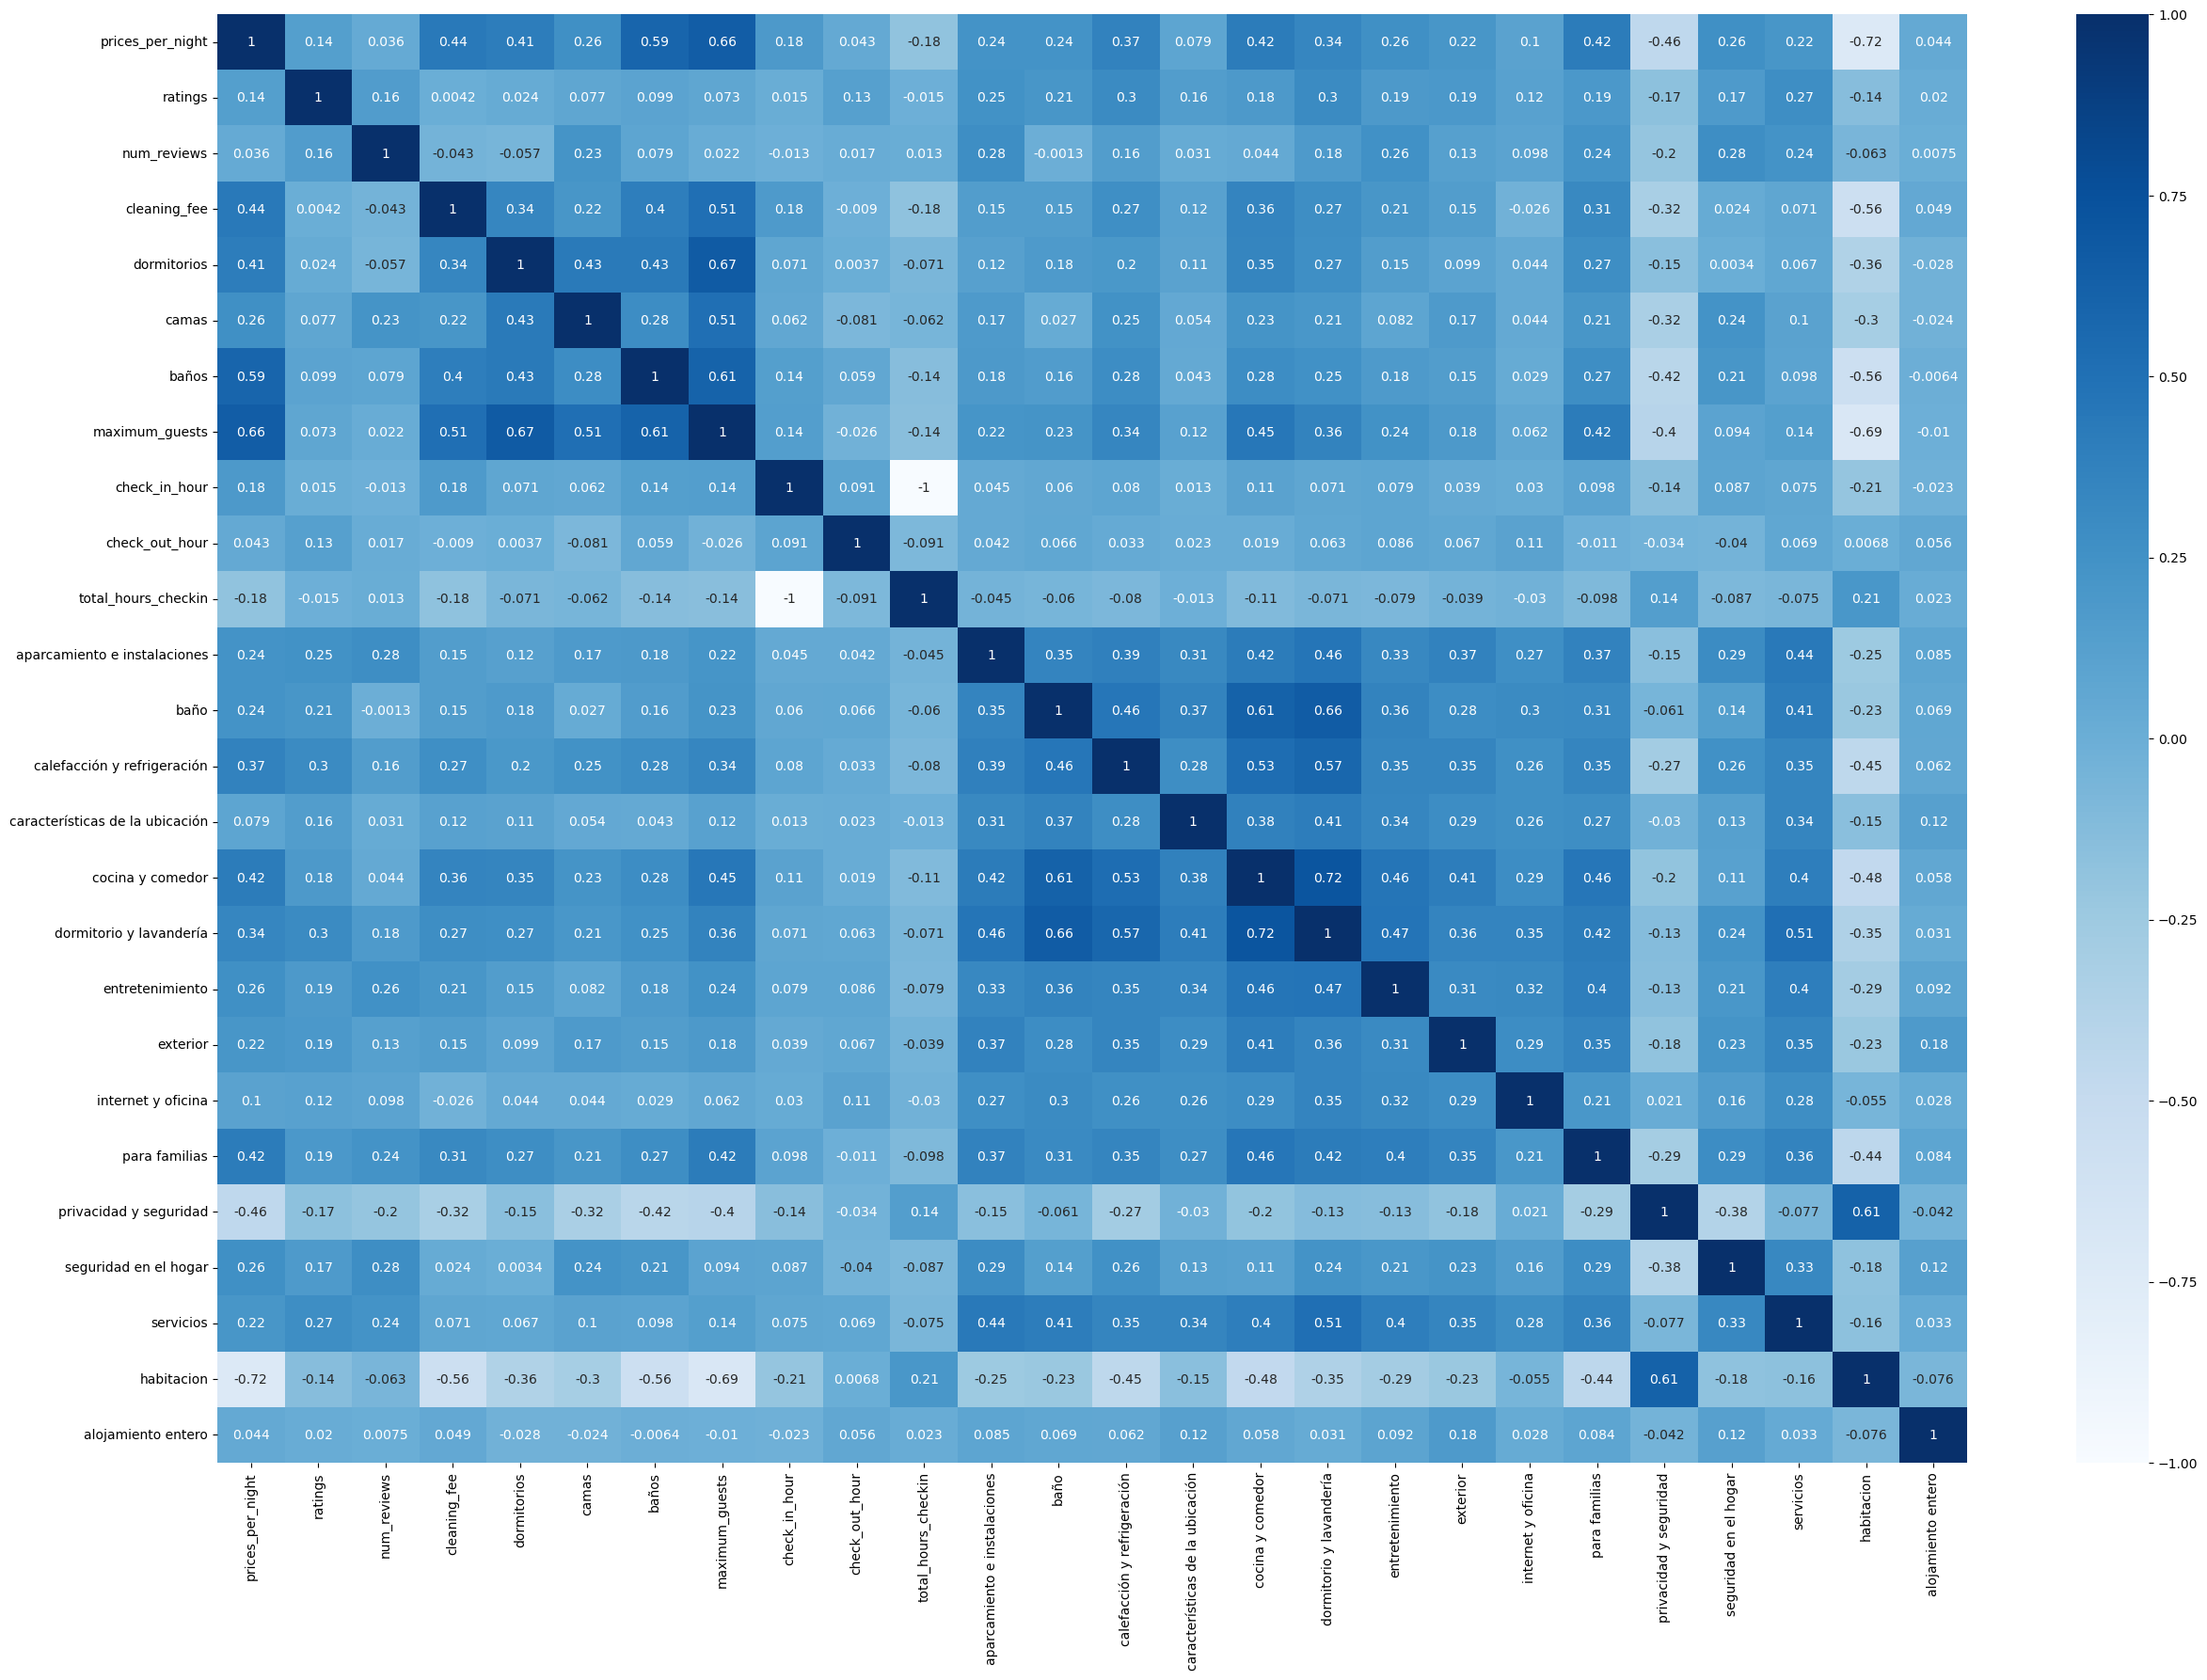

In [14]:
plt.figure(figsize=(30, 20))

sns.heatmap(data = df_encoded.corr(), annot = True,cmap="Blues")

Feature Importance se observa que los servicios tienen algo que ver con los precios.

Feature Importance:
 1. feature  0 (  0.5036260114374262): habitacion
 2. feature  1 ( 0.09258669432638936): baños
 3. feature  2 ( 0.07124782996016302): ratings
 4. feature  3 ( 0.04655930725290746): cleaning_fee
 5. feature  4 (0.031955689452804754): num_reviews
 6. feature  5 (0.027912342720336988): seguridad en el hogar
 7. feature  6 (  0.0259594944397191): dormitorio y lavandería
 8. feature  7 (  0.0221158032764188): maximum_guests
 9. feature  8 (0.020628900520488713): cocina y comedor
10. feature  9 ( 0.01915752911083613): para familias
11. feature 10 (0.013921680151692515): exterior
12. feature 11 ( 0.01389952796104209): baño
13. feature 12 (0.013406596946641765): servicios
14. feature 13 (0.013101648981558916): dormitorios
15. feature 14 (0.012090941352698795): camas
16. feature 15 (0.012000836734011389): aparcamiento e instalaciones
17. feature 16 (0.010226764377183959): características de la ubicación
18. feature 17 (0.009097195894662617): entretenimiento
19. feature 18 (0

<timed exec>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

<timed exec>:26: UserWarning: 
The palette list has fewer values (17) than needed (25) and will cycle, which may produce an uninterpretable plot.


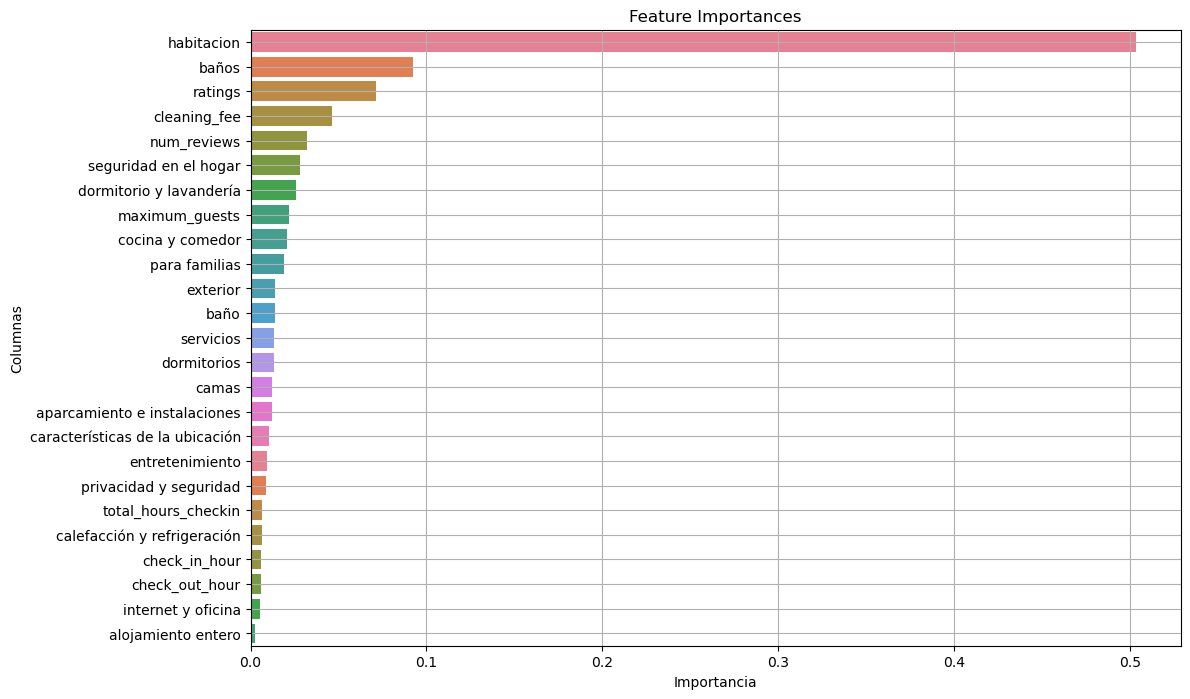

CPU times: total: 2.16 s
Wall time: 2.16 s


In [15]:
%%time

# Feature Importance

# Modelo de RandomForest para obtener Feature Importance
model = RandomForestRegressor(n_estimators = 250,
                               random_state = 0)
# Entrenamos el modelo
model.fit(df.drop(["prices_per_night"], axis = 1), df["prices_per_night"])

# Calculamos Feature Importance
importances = model.feature_importances_

df = pd.DataFrame(data = zip(df.drop(["prices_per_night"], axis = 1).columns, importances),
                              columns = ["Columnas", "Importancia"])

df = df.sort_values("Importancia", ascending = False)

print("Feature Importance:")

for index, (feature, importance) in enumerate(df.values):
    
    print(f"{index + 1:2}. feature {index:2} ({importance:20}): {feature}")

plt.figure(figsize = (12, 8))

plt.title("Feature Importances")
sns.barplot(x = df["Importancia"], y = df["Columnas"], palette = sns.color_palette("husl", 17))

plt.grid()
plt.show()

TRAIN TEST

In [16]:
X = df_encoded.drop("prices_per_night", axis = 1)
y = df_encoded["prices_per_night"]
print(X.shape, y.shape)

(2497, 25) (2497,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (1997, 25), y_train: (1997,)
X_test: (500, 25), y_test: (500,)


Escalado

In [18]:
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = y_scaler.transform(np.array(y_test).reshape(-1, 1))

Buscar el mejor modelo copn el r2 mas alto 

In [ ]:
# Definimos los modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42)
}

In [ ]:
# Lista para almacenar los resultados
resultados_lista = []

# Bucle para entrenar cada modelo y calcular métricas
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_hat = model.predict(X_test)
    
    # Desescalado de las predicciones
    y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()
    y_hat_inv = y_scaler.inverse_transform(y_hat.reshape(-1, 1)).ravel()
    
    # Cálculo de métricas
    mae = mean_absolute_error(y_test_inv, y_hat_inv)
    mse = mean_squared_error(y_test_inv, y_hat_inv)
    r2 = r2_score(y_test_inv, y_hat_inv)
    
    # Almacenar resultados
    resultados_lista.append({
        "model_name": model_name,
        "mae": mae,
        "mse": mse,
        "r2_score": r2
    })

# Crear DataFrame y ordenar por r2_score
resultados = pd.DataFrame(resultados_lista)
resultados = resultados.sort_values(by="r2_score", ascending=False)

In [23]:
resultados

,model_name,mae,mse,r2_score
4,XGBoost,7.727233,230.060692,0.868517
5,LightGBM,9.984999,244.832072,0.860075
1,Random Forest,8.630907,260.019643,0.851395
3,Gradient Boosting,13.894606,376.916850,0.784586
0,Linear Regression,18.399287,649.362581,0.628880
6,MLP Regressor,19.798497,691.204998,0.604966
2,Support Vector Regressor,21.398940,712.112348,0.593017
